In [1]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
#loading data
df = pd.read_excel('combined_data_cases.xlsx')
df.head()

,state,year,disease,cases,deaths
0,Al Jazirah,2018,Acute Tonsillitis,16,0
1,Al Qadarif,2018,Acute Tonsillitis,27,0
2,Blue Nile,2018,Acute Tonsillitis,18,0
3,Central Darfur,2018,Acute Tonsillitis,2,0
4,East Darfur,2018,Acute Tonsillitis,2,0


In [40]:
#checking data shape and info
df.shape

(360, 5)

In [41]:
#checking for uniqueness
df.state.unique()

array(['Al Jazirah', 'Al Qadarif', 'Blue Nile', 'Central Darfur',
       'East Darfur', 'Kassala', 'Khartoum', 'North Darfur',
       'North Kordofan', 'Northern', 'Red Sea', 'River Nile', 'Sennar',
       'South Darfur', 'South Kordofan', 'West Darfur', 'West Kordofan',
       'White Nile', 'Aj Jazirah'], dtype=object)

Al Jazirah appeared twice with the second one being Aj Jazirah so it will be corrected

In [42]:
df['state'] = df['state'].replace('Aj Jazirah','Al Jazirah')
df.state.unique()

array(['Al Jazirah', 'Al Qadarif', 'Blue Nile', 'Central Darfur',
       'East Darfur', 'Kassala', 'Khartoum', 'North Darfur',
       'North Kordofan', 'Northern', 'Red Sea', 'River Nile', 'Sennar',
       'South Darfur', 'South Kordofan', 'West Darfur', 'West Kordofan',
       'White Nile'], dtype=object)

In [43]:
df.shape

(360, 5)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    360 non-null    object
 1   year     360 non-null    int64 
 2   disease  360 non-null    object
 3   cases    360 non-null    int64 
 4   deaths   360 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.2+ KB


In [45]:
#checking for missing values
df.isna().sum()

state      0
year       0
disease    0
cases      0
deaths     0
dtype: int64

In [46]:
#Data Statistics
df.describe()

,year,cases,deaths
count,360.000000,360.000000,360.000000
mean,2019.450000,211.719444,4.011111
std,2.315685,1109.607078,27.400972
min,2018.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000
50%,2018.000000,11.000000,0.000000
75%,2019.000000,41.250000,0.000000
max,2024.000000,11627.000000,317.000000


### Univariate Analysis

In [47]:
num_cols = df.select_dtypes('int','float')
cat_cols = df.select_dtypes('object')

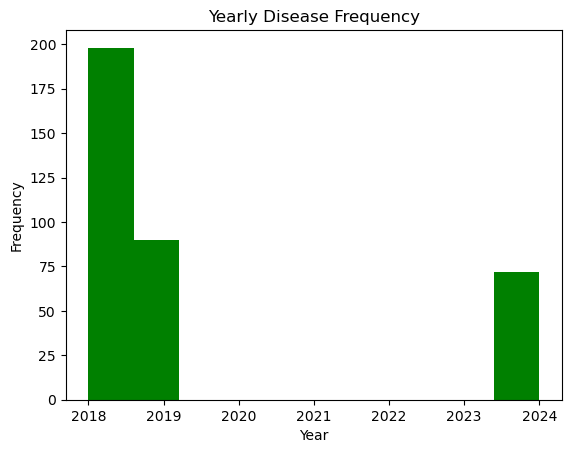

In [48]:
plt.hist(df['year'],color = 'green')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Disease Frequency');

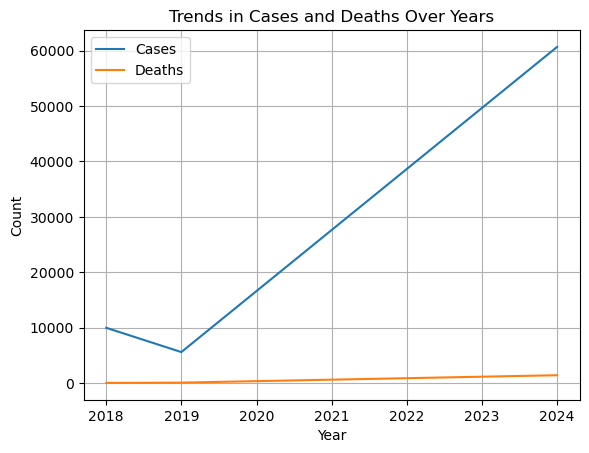

In [49]:
#cases and deaths that occurred yearly
yearly_trends = df.groupby('year')[['cases','deaths']].sum().reset_index()
yearly_trends

#plotting trends in deaths and case over the years
plt.plot(yearly_trends['year'], yearly_trends['cases'],label='Cases')
plt.plot(yearly_trends['year'], yearly_trends['deaths'],label='Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trends in Cases and Deaths Over Years')
plt.legend()
plt.grid()
plt.show();

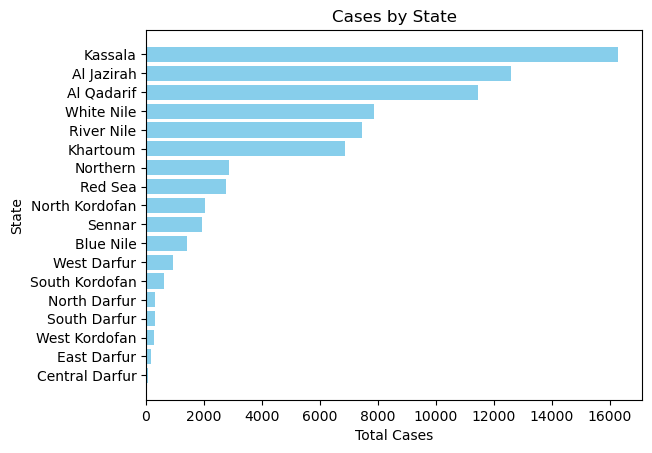

In [51]:
#grouping cases and deaths by states
state_analysis = df.groupby('state')[['cases', 'deaths']].sum().reset_index()

# Plot cases by state
state_analysis = state_analysis.sort_values(by='cases', ascending=True)
plt.barh(state_analysis['state'], state_analysis['cases'], color='skyblue')
plt.xlabel('Total Cases')
plt.ylabel('State')
plt.title('Cases by State')
plt.show()


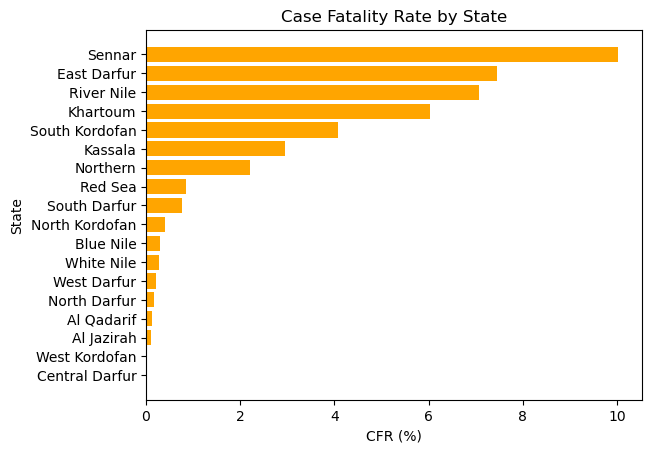

In [52]:
# did a little feature engineering to determine case fatality rate i.e deaths/cases * 100
df['CFR'] = (df['deaths'] / df['cases']) * 100

#cfr by states
state_cfr = df.groupby('state')['CFR'].mean().reset_index()

#visualizing it
state_cfr = state_cfr.sort_values(by='CFR', ascending=True)
plt.barh(state_cfr['state'], state_cfr['CFR'], color='orange')
plt.xlabel('CFR (%)')
plt.ylabel('State')
plt.title('Case Fatality Rate by State');

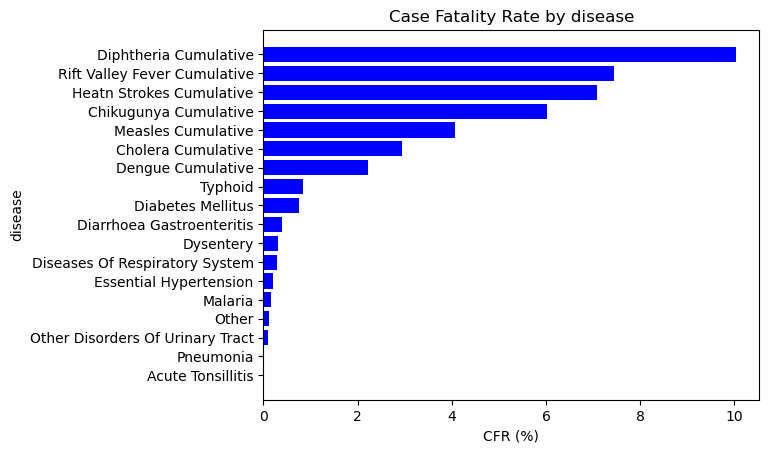

In [53]:
#cfr by diseases
disease_cfr = df.groupby('disease')['CFR'].mean().reset_index()

#visualizing it
disease_cfr = disease_cfr.sort_values(by='CFR', ascending=True)
plt.barh(disease_cfr['disease'], state_cfr['CFR'], color='blue')
plt.xlabel('CFR (%)')
plt.ylabel('disease')
plt.title('Case Fatality Rate by disease');

In [54]:
df2 = pd.read_csv('disease_indicators.csv')
df2.head()

,GHO (CODE),YEAR (DISPLAY),STARTYEAR,ENDYEAR,DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Low,High
0,MALARIA_CONF_CASES,2020,2020,2020,NaN,NaN,NaN,1698394.00,0.00,0.00
1,MALARIA_EST_MORTALITY,2021,2021,2021,NaN,NaN,NaN,16.19,5.75,34.16
2,MALARIA_EST_MORTALITY,2014,2014,2014,NaN,NaN,NaN,9.01,3.88,15.78
3,MALARIA_SUSPECTS,2017,2017,2017,NaN,NaN,NaN,3691112.00,0.00,0.00
4,MALARIA_EST_MORTALITY,2012,2012,2012,NaN,NaN,NaN,7.71,3.36,13.28


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GHO (CODE)        4965 non-null   object 
 1   YEAR (DISPLAY)    4965 non-null   int64  
 2   STARTYEAR         4965 non-null   int64  
 3   ENDYEAR           4965 non-null   int64  
 4   DIMENSION (TYPE)  3737 non-null   object 
 5   DIMENSION (CODE)  3737 non-null   object 
 6   DIMENSION (NAME)  3737 non-null   object 
 7   Numeric           4654 non-null   float64
 8   Low               4965 non-null   float64
 9   High              4965 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 388.0+ KB
